In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
# 制作数据集

# 设定下载参数
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(0.1307, 0.3081)
])

# 下载训练集与测试集
train_Data = datasets.MNIST(
    root = 'D:/Jupyter/dataset/mnist/', 
    train = True, 
    download = True, 
    transform = transform
)
test_Data = datasets.MNIST(
    root = 'D:/Jupyter/dataset/mnist/', 
    train = False, 
    download = True, 
    transform = transform
)

In [4]:
# 批次加载器
train_loader = DataLoader(train_Data, shuffle=True, batch_size=64)
test_loader  = DataLoader(test_Data, shuffle=False, batch_size=64)

In [5]:
class DNN(nn.Module):

    def __init__(self):
        ''' 搭建神经网络各层 '''
        super(DNN,self).__init__()
        self.net = nn.Sequential(            # 按顺序搭建各层
            nn.Flatten(),                    # 先把图像铺平成一维
            nn.Linear(784, 512), nn.ReLU(),  # 第1层：全连接层
            nn.Linear(512, 256), nn.ReLU(),  # 第2层：全连接层
            nn.Linear(256, 128), nn.ReLU(),  # 第3层：全连接层
            nn.Linear(128, 64),  nn.ReLU(),  # 第4层：全连接层
            nn.Linear(64, 10),               # 第5层：全连接层
        )

    def forward(self, x):
        ''' 前向传播 '''
        y = self.net(x)        # x即输入数据
        return y               # y即输出数据

In [6]:
model = DNN().to('cuda:0')    # 创建子类的实例，并搬到GPU上
model                         # 查看该实例的各层

DNN(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [7]:
# 损失函数的选择
loss_fn = nn.CrossEntropyLoss()    # 自带softmax激活函数

In [8]:
# 优化算法的选择
learning_rate = 0.01    # 设置学习率
optimizer = torch.optim.SGD(
    model.parameters(), 
    lr = learning_rate, 
    momentum = 0.5
)

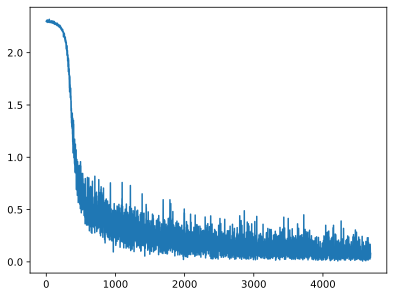

In [9]:
# 训练网络
epochs = 5
losses = []        # 记录损失函数变化的列表

for epoch in range(epochs):
    for (x, y) in train_loader:                  # 获取小批次的x与y
        x, y = x.to('cuda:0'), y.to('cuda:0')    # 把小批次搬到GPU上
        Pred = model(x)                          # 一次前向传播（小批量）
        loss = loss_fn(Pred, y)                  # 计算损失函数
        losses.append(loss.item())               # 记录损失函数的变化
        optimizer.zero_grad()                    # 清理上一轮滞留的梯度
        loss.backward()                          # 一次反向传播
        optimizer.step()                         # 优化内部参数

Fig = plt.figure()
plt.plot(range(len(losses)), losses)
plt.show()

In [10]:
# 测试网络
correct = 0
total = 0

with torch.no_grad():                                   # 该局部关闭梯度计算功能
    for (x, y) in test_loader:                          # 获取小批次的x与y
        x, y = x.to('cuda:0'), y.to('cuda:0')           # 把小批次搬到GPU上
        Pred = model(x)                                 # 一次前向传播（小批量）
        _, predicted = torch.max(Pred.data, dim=1)
        correct += torch.sum( (predicted == y) )
        total += y.size(0) 
        
print(f'测试集精准度: {100*correct/total} %')

测试集精准度: 96.83999633789062 %
